# Results notebook

In this notebook, I have tested out the different algorithms:
- how long they take to find the goal position
- memory usage
- how optimal is the path, this is shown by:
    - distance of the path
    - how many turns need to be taken
    - also modelling the acceleration of the mouse, we can account for the time it "would" take in real time to travel a path 

In [1]:
from algorithms.utilities.Utils import Utils
from algorithms.utilities.Stats import Stats

from algorithms.classical.floodfill.FloodFill import FloodFill
from algorithms.classical.bfs.BFS import BFS
from algorithms.classical.dijkstra.Dijkstra import Dijkstra
from algorithms.classical.astar.AStar import AStar

from algorithms.reinforcement_learning.sarsa.Sarsa import Sarsa
from algorithms.reinforcement_learning.q_learning.Qlearning import QLearning
from algorithms.reinforcement_learning.dynaq.DynaQLearning import DynaQLearning
from algorithms.reinforcement_learning.dynaq.DynaQSarsa import DynaQSarsa

In [2]:
maze = Utils.load_maze('mazes/competition_json/AAMC23Maze.json')

## Classical Algorithms

### Floodfill

In [3]:
flood = FloodFill(walls=maze)
path = flood.get_path_from_flood_map()
print(flood.get_stats())
print(flood.get_path())
print(len(flood.flood_map))
for row in flood.flood_map:
    print(row)

(37, 18, 0)
[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (1, 13), (2, 13), (3, 13), (3, 14), (4, 14), (4, 15), (5, 15), (5, 14), (6, 14), (6, 15), (7, 15), (7, 14), (7, 13), (6, 13), (5, 13), (5, 12), (6, 12), (6, 11), (7, 11), (7, 10), (8, 10), (8, 9), (8, 8)]
16
[36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 24, 23]
[35, 36, 33, 32, 31, 32, 29, 30, 27, 28, 27, 24, 25, 22, 25, 22]
[34, 33, 32, 31, 30, 29, 28, 31, 26, 29, 28, 23, 22, 21, 22, 21]
[35, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 20]
[34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 24, 9, 18, 17]
[21, 20, 21, 22, 23, 24, 25, 26, 29, 26, 25, 24, 7, 8, 15, 16]
[20, 19, 14, 13, 10, 9, 10, 27, 28, 27, 26, 5, 6, 9, 14, 13]
[17, 18, 15, 12, 11, 8, 7, 0, 0, 28, 3, 4, 7, 10, 11, 12]
[16, 17, 14, 15, 16, 17, 6, 0, 0, 1, 2, 5, 6, 17, 14, 13]
[15, 16, 13, 12, 13, 6, 5, 4, 3, 2, 3, 4, 15, 16, 15, 20]
[14, 15, 14, 11, 10, 7, 8, 5, 4, 5, 4, 13

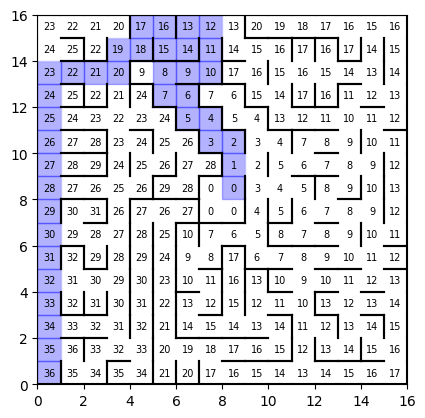

In [4]:
Utils().draw_maze(walls=maze, path=flood.get_path(), dist_map= flood.flood_map)

In [5]:
stats = Stats()
print(stats.get_time_from_path(flood.get_path()))

gi
1.26 1.0
0.26 1 0.26
41.50002029339273


### BFS

In [6]:
bfs = BFS(walls=maze)
path = bfs.find_shortest_path_to_goal()
print(bfs.get_stats())
print(bfs.get_path())

0
(37, 18, 0)
[(8, 8), (8, 9), (8, 10), (7, 10), (7, 11), (6, 11), (6, 12), (5, 12), (5, 13), (6, 13), (7, 13), (7, 14), (7, 15), (6, 15), (6, 14), (5, 14), (5, 15), (4, 15), (4, 14), (3, 14), (3, 13), (3, 12), (3, 11), (3, 10), (3, 9), (3, 8), (3, 7), (3, 6), (3, 5), (3, 4), (3, 3), (3, 2), (2, 2), (1, 2), (0, 2), (0, 1), (0, 0)]


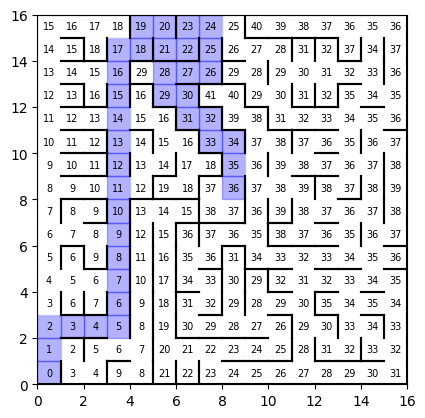

In [7]:
Utils().draw_maze(walls=maze, path=bfs.get_path(), dist_map = bfs.distances)

### Dijkstra

In [8]:
dijkstra = Dijkstra(walls=maze)
path = dijkstra.find_shortest_path_to_goal()
print(dijkstra.get_stats())
print(dijkstra.get_path())

(37, 18, 0)
[(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (4, 14), (4, 15), (5, 15), (5, 14), (6, 14), (6, 15), (7, 15), (7, 14), (7, 13), (6, 13), (5, 13), (5, 12), (6, 12), (6, 11), (7, 11), (7, 10), (8, 10), (8, 9), (8, 8)]


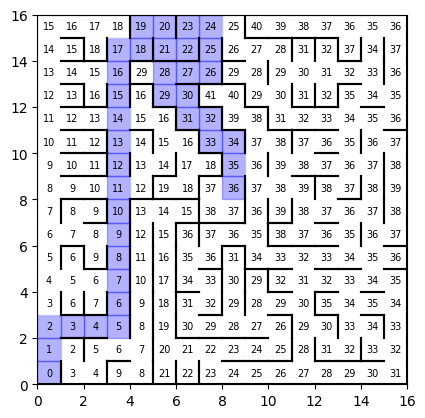

In [9]:
Utils().draw_maze(walls=maze, path=dijkstra.get_path(), dist_map = dijkstra.distances)

In [28]:
print(stats.get_time_from_path(dijkstra.get_path()))

gi
1.08 1.0
0.08000000000000007 1 0.08000000000000007
42.01848126247539


### A*

In [10]:
astar = AStar(walls=maze)
path = astar.find_shortest_path_to_goal()
print(astar.get_path())
print(astar.get_stats())

Filename: D:\Diss\Simulator\final\algorithms\classical\astar\AStar.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    51    122.9 MiB    122.9 MiB           1       @profile
    52                                             def find_shortest_path_to_goal(self):
    53    122.9 MiB      0.0 MiB           1           self.a_star()
    54    122.9 MiB      0.0 MiB           9           goal_position = min(self.goal_positions, key=lambda pos: self.distances[pos[0]][pos[1]])
    55    122.9 MiB      0.0 MiB           1           self.curr_position = goal_position
    56    122.9 MiB      0.0 MiB           1           self.path.append(self.curr_position)
    57                                         
    58    122.9 MiB      0.0 MiB          37           while self.curr_position != self.start_position:
    59    122.9 MiB      0.0 MiB          36               x, y = self.curr_position
    60    122.9 MiB      0.0 MiB         252               neighbors = [(x + dx, y + d

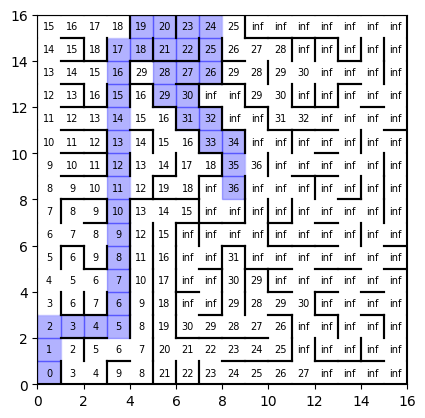

In [11]:
Utils().draw_maze(walls=maze, path=astar.get_path(), dist_map = astar.distances)

## Reinforcememnt Learning

### Sarsa

In [25]:
sarsa = Sarsa(walls=maze)

Running episode: 0
Prev: 0, Current reward: -389230.0
stats: (960, 602, 0)
Running episode: 1
Prev: -389230.0, Current reward: -89070.5
stats: (292, 172, 0)
Running episode: 2
Prev: -89070.5, Current reward: -59156.75
stats: (634, 304, 0)
Running episode: 3
Prev: -59156.75, Current reward: -9094.0
stats: (378, 174, 0)
Running episode: 4
Prev: -9094.0, Current reward: -9088.0
stats: (354, 156, 0)
Running episode: 5
Prev: -9088.0, Current reward: -9098.5
stats: (396, 192, 0)
Running episode: 6
Prev: -9098.5, Current reward: 922.25
stats: (312, 148, 0)
Running episode: 7
Prev: 922.25, Current reward: 838.75
stats: (646, 298, 0)
Running episode: 8
Prev: 838.75, Current reward: -9084.5
stats: (340, 164, 0)
Running episode: 9
Prev: -9084.5, Current reward: 909.75
stats: (362, 164, 0)
Running episode: 10
Prev: 909.75, Current reward: -9092.5
stats: (372, 184, 0)
Running episode: 11
Prev: -9092.5, Current reward: 967.25
stats: (132, 66, 0)
Running episode: 12
Prev: 967.25, Current reward: 908.

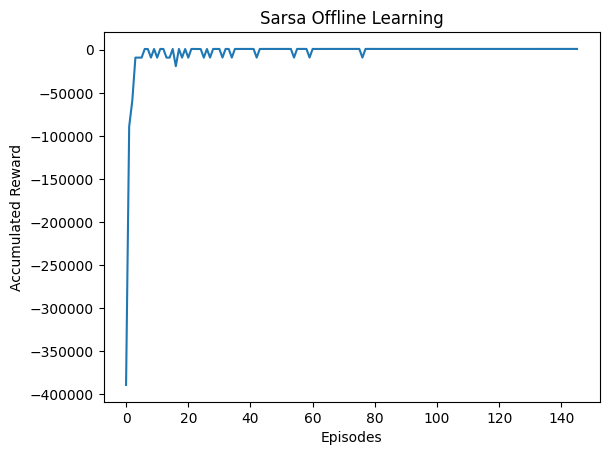

In [26]:
sarsa.run_sarsa()

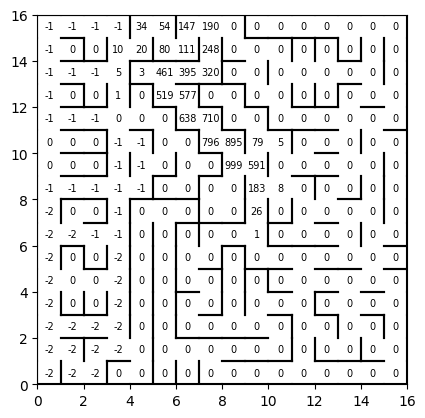

In [27]:
Utils.draw_maze(walls=maze, dist_map=sarsa.get_max_q_values())

### QLearning


Running episode: 0
Prev: 0, Current reward: -129060.5
stats: (256, 156, 0)
Running episode: 1
Prev: -129060.5, Current reward: -409296.5
stats: (1228, 730, 0)
Running episode: 2
Prev: -409296.5, Current reward: -49040.5
stats: (168, 98, 0)
Running episode: 3
Prev: -49040.5, Current reward: -109206.0
stats: (836, 476, 0)
Running episode: 4
Prev: -109206.0, Current reward: -19029.75
stats: (122, 58, 0)
Running episode: 5
Prev: -19029.75, Current reward: -149151.0
stats: (620, 328, 0)
Running episode: 6
Prev: -149151.0, Current reward: -99112.75
stats: (462, 224, 0)
Running episode: 7
Prev: -99112.75, Current reward: -29038.5
stats: (158, 92, 0)
Running episode: 8
Prev: -29038.5, Current reward: -9026.5
stats: (108, 56, 0)
Running episode: 9
Prev: -9026.5, Current reward: -149187.5
stats: (766, 400, 0)
Running episode: 10
Prev: -149187.5, Current reward: -29045.5
stats: (186, 98, 0)
Running episode: 11
Prev: -29045.5, Current reward: -39040.25
stats: (166, 82, 0)
Running episode: 12
Prev:

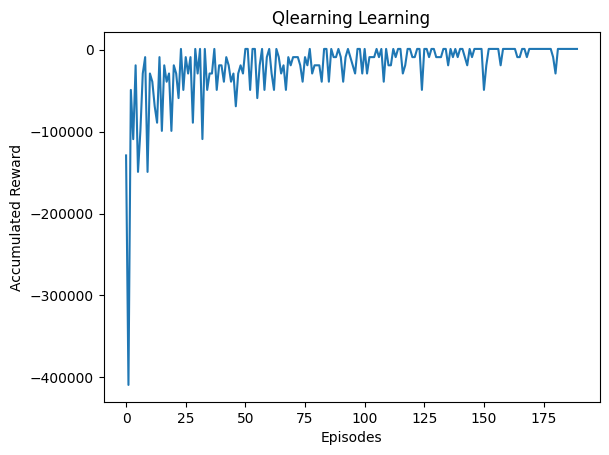

In [21]:
qlearning = QLearning(walls=maze)
qlearning.run_qlearning()

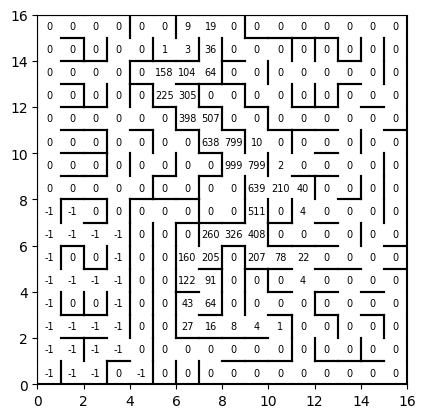

In [16]:
Utils.draw_maze(walls=maze, dist_map=qlearning.get_max_q_values())


### DynaQ QLearning

Running episode: 0
Prev: 0, Current reward: -289601.3221051411
stats: (708, 436, 601.3221051433549)
Running episode: 1
Prev: -289601.3221051411, Current reward: -99218.10033856778
stats: (288, 154, 218.10033856797588)
Running episode: 2
Prev: -99218.10033856778, Current reward: -19238.74822371821
stats: (376, 140, 238.74822371796978)
Running episode: 3
Prev: -19238.74822371821, Current reward: 971.0149673400365
stats: (38, 18, 28.98503265996347)
Running episode: 4
Prev: 971.0149673400365, Current reward: 971.0149673400365
stats: (38, 18, 28.98503265996347)
Running episode: 5
Prev: 971.0149673400365, Current reward: 971.0149673400365
stats: (38, 18, 28.98503265996347)
Running episode: 6
Prev: 971.0149673400365, Current reward: 971.0149673400365
stats: (38, 18, 28.98503265996347)
Running episode: 7
Prev: 971.0149673400365, Current reward: 971.0149673400365
stats: (38, 18, 28.98503265996347)
stopped at episode: 7


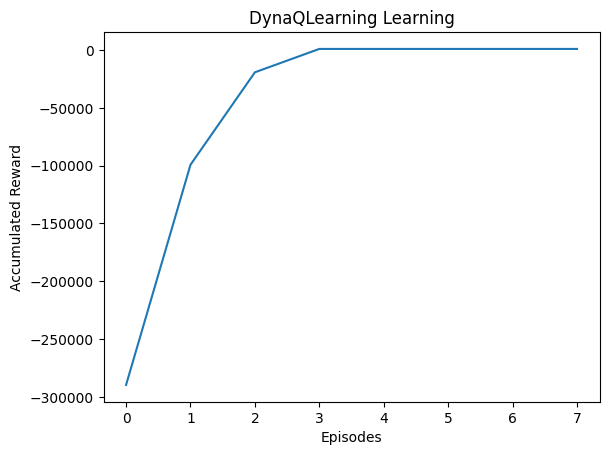

In [17]:
dyna_qlearning = DynaQLearning(walls=maze)
dyna_qlearning.run_dyna_qlearning()

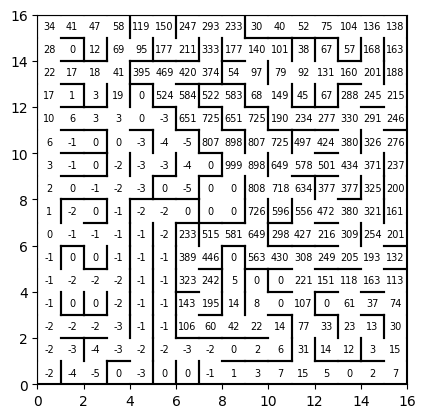

In [18]:
Utils.draw_maze(walls=maze, dist_map=dyna_qlearning.get_max_q_values())

### DynaQ Sarsa


Running episode: 0
Prev: 0, Current reward: -309543.6103829537
stats: (644, 406, 543.6103829552985)
Running episode: 1
Prev: -309543.6103829537, Current reward: -29076.738568693672
stats: (112, 50, 76.73856869366521)
Running episode: 2
Prev: -29076.738568693672, Current reward: -9270.78267087847
stats: (458, 152, 270.78267087861417)
Running episode: 3
Prev: -9270.78267087847, Current reward: 907.1396589236329
stats: (164, 50, 92.86034107636712)
Running episode: 4
Prev: 907.1396589236329, Current reward: 737.4960704721263
stats: (520, 132, 262.5039295278736)
Running episode: 5
Prev: 737.4960704721263, Current reward: 962.8219555917675
stats: (54, 22, 37.17804440823249)
Running episode: 6
Prev: 962.8219555917675, Current reward: 971.2519783467569
stats: (36, 18, 28.748021653243068)
Running episode: 7
Prev: 971.2519783467569, Current reward: 971.2519783467569
stats: (36, 18, 28.748021653243068)
Running episode: 8
Prev: 971.2519783467569, Current reward: 971.2519783467569
stats: (36, 18, 2

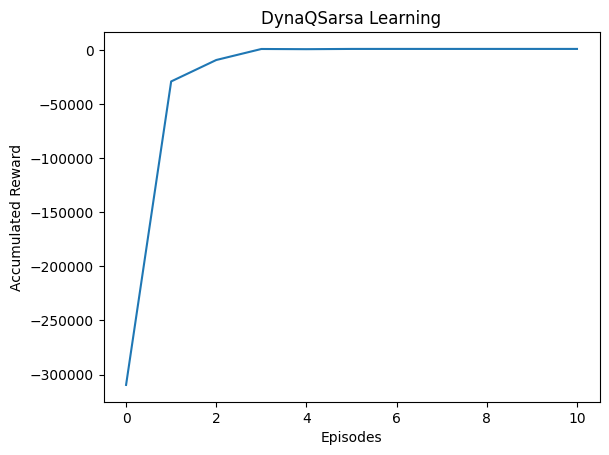

In [19]:
dynaq_sarsa = DynaQSarsa(walls=maze)
dynaq_sarsa.run_dyna_sarsa()

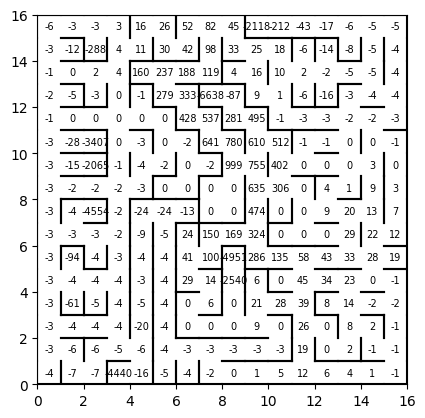

In [20]:
Utils.draw_maze(walls=maze, dist_map=dynaq_sarsa.get_max_q_values())